In [1]:
#

import xbbg
import scipy
from scipy.interpolate import CubicSpline
from xbbg import blp
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
import os
import matplotlib.ticker as plticker
import pandas_datareader as pdr
import matplotlib.ticker as mticker
from itertools import combinations
#data
tickers = ['MJUS Equity',
'IIPR Equity',
'TLRY Equity',
'CRON US Equity',
'SNDL Equity',
'CGC Equity',
'REFI Equity',
'AFCG Equity',
'ACB Equity',
'GRWG Equity',
'HITI CN Equity',
'OGI US Equity',
'MAPS Equity',
'VFF Equity',
'TPB Equity',
'IMB LN Equity',
'SMG US Equity',
'IXHL Equity',
'HYFM Equity',
'VGR US Equity',
'MATV Equity',
'MO Equity',
'PM Equity',
'BATS LN Equity',
'JAZZ Equity',
'STG DC Equity',
'INCR US Equity',
'CWEB CN Equity',
'XXII Equity',
'ICA* MM Equity'
]

start_date = datetime.today()- \
                        relativedelta(days = 2*252) #datetime.strptime(df.index[-10],'%d/%m/%Y')
#set end date (t)
end_date = datetime.today()#.strftime('%d/%m/%Y')
#ticker = str('TYA Comdty')
#lets do outright futures, swap spreads and future spreads
fut = blp.bdh(tickers=tickers
             , flds=['Px_last'],
             start_date= start_date, end_date=end_date,Per='D')
fut.index.names = ['date']
fut.index = fut.index#.strftime('%d/%m/%Y')
fut.columns = fut.columns.droplevel(1)
#df = fut.copy()
#df['daily_ret'] = df.diff()
#df['pct_ret'] = df['daily_ret']/df['AA US Equity'].shift(1)

#Create a combination of equity pairs
eq_pairs = []
for combo in combinations(tickers, 2):
    eq_pairs.append(combo)

df_ratios = pd.DataFrame(index = fut.index)    

#Create all the ratios
for pair in eq_pairs:
    ratio = fut[pair[0]].copy()/fut[pair[1]].copy()
    ratio_name = str(pair[0]) +"_"+str(pair[1])
    df_ratios[ratio_name] = ratio

C:\Users\chengc3\AppData\Local\Temp\ipykernel_16180\2427279075.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ratios[ratio_name] = ratio
C:\Users\chengc3\AppData\Local\Temp\ipykernel_16180\2427279075.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ratios[ratio_name] = ratio
C:\Users\chengc3\AppData\Local\Temp\ipykernel_16180\2427279075.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [140]:
df_ratios

,MJUS Equity_IIPR Equity,MJUS Equity_TLRY Equity,MJUS Equity_CRON US Equity,MJUS Equity_SNDL Equity,MJUS Equity_CGC Equity,MJUS Equity_REFI Equity,MJUS Equity_AFCG Equity,MJUS Equity_ACB Equity,MJUS Equity_GRWG Equity,MJUS Equity_HITI CN Equity,...,STG DC Equity_INCR US Equity,STG DC Equity_CWEB CN Equity,STG DC Equity_XXII Equity,STG DC Equity_ICA* MM Equity,INCR US Equity_CWEB CN Equity,INCR US Equity_XXII Equity,INCR US Equity_ICA* MM Equity,CWEB CN Equity_XXII Equity,CWEB CN Equity_ICA* MM Equity,XXII Equity_ICA* MM Equity
date,,,,,,,,,,,,,,,,,,,,,
2022-09-13,0.028732,0.783133,0.841424,0.992366,0.977444,0.179063,0.149511,26.804124,0.582960,1.368421,...,23.622560,160.147059,5.627936,74.589041,6.779412,0.238244,3.157534,0.035142,0.465753,13.253356
2022-09-14,0.029029,0.764793,0.831190,0.923214,1.017717,0.174544,0.148906,27.795699,0.596998,1.360526,...,23.736264,161.194030,5.669321,73.972603,6.791045,0.238846,3.116438,0.035171,0.458904,13.047877
2022-09-15,0.028292,0.752212,0.799373,0.917266,0.996094,0.174061,0.146889,25.500000,0.580866,1.335079,...,24.897494,170.781250,5.783099,74.863014,6.859375,0.232276,3.006849,0.033863,0.438356,12.945137
2022-09-16,0.027772,0.796238,0.832787,0.962121,0.992188,0.170241,0.152736,27.311828,0.603325,1.289340,...,25.427252,193.157895,5.967512,NaN,7.596491,0.234690,NaN,0.030894,NaN,NaN
2022-09-19,0.025022,0.795031,0.836601,0.988417,1.015873,0.166667,0.153754,27.234043,0.602353,1.299492,...,24.316703,196.666667,6.333369,76.780822,8.087719,0.260453,3.157534,0.032204,0.390411,12.123219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,0.022182,1.052234,1.031294,1.470142,0.653912,0.129314,0.177171,NaN,0.867322,0.829160,...,97.857143,503.265306,680.839315,83.310811,5.142857,6.957482,0.851351,1.352844,0.165541,0.122365
2024-01-25,0.022640,1.065327,1.044335,1.482517,0.668770,0.130622,0.177703,NaN,0.876033,0.834646,...,100.737705,481.960784,714.950553,83.040541,4.784314,7.097150,0.824324,1.483421,0.172297,0.116149
2024-01-26,0.021970,1.083770,1.056122,1.468085,NaN,0.127778,0.173658,NaN,0.848361,0.796154,...,101.557377,495.600000,720.348837,83.716216,4.880000,7.093023,0.824324,1.453488,0.168919,0.116216


<AxesSubplot:xlabel='date'>

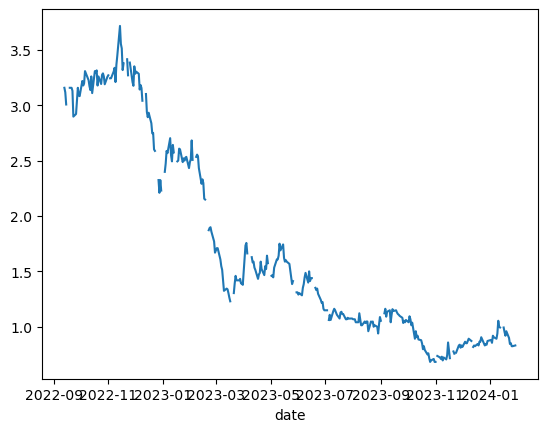

In [100]:
df_ratios['INCR US Equity_ICA* MM Equity'].plot()


In [2]:
"""brownian_motion.py"""

from typing import Optional

import numpy as np


def get_corr_dW_matrix(
    T: int,
    n_procs: int,
    rho: Optional[float] = None,
    random_state: Optional[int] = None,
) -> np.ndarray:
    """
    2D array of n_procs discrete Brownian Motion increments dW.
    Each column of the array is one process.
    So that the resulting shape of the array is (T, n_procs).
        - T is the number of samples of each process.
        - The correlation constant rho is used to generate a new process,
            which has rho correlation to a random process already generated,
            hence rho is only an approximation to the pairwise correlation.
        - Optional random_state to reproduce results.
    """
    rng = np.random.default_rng(random_state)
    dWs: list[np.ndarray] = []
    for i in range(n_procs):
        random_state_i = _get_random_state_i(random_state, i)
        if i == 0 or rho is None:
            dW_i = get_dW(T, random_state=random_state_i)
        else:
            dW_corr_ref = _get_corr_ref_dW(dWs, i, rng)
            dW_i = _get_correlated_dW(dW_corr_ref, rho, random_state_i)
        dWs.append(dW_i)
    return np.asarray(dWs).T


def get_dW(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Sample T times from a normal distribution,
    to simulate discrete increments (dW) of a Brownian Motion.
    Optional random_state to reproduce results.
    """
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, T)


def get_W(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Simulate a Brownian motion discretely samplet at unit time increments.
    Returns the cumulative sum
    """
    dW = get_dW(T, random_state)
    # cumulative sum and then make the first index 0.
    dW_cs = dW.cumsum()
    return np.insert(dW_cs, 0, 0)[:-1]


def _get_correlated_dW(
    dW: np.ndarray, rho: float, random_state: Optional[int] = None
) -> np.ndarray:
    """
    Sample correlated discrete Brownian increments to given increments dW.
    """
    dW2 = get_dW(
        len(dW), random_state=random_state
    )  # generate Brownian icrements.
    if np.array_equal(dW2, dW):
        # dW cannot be equal to dW2.
        raise ValueError(
            "Brownian Increment error, try choosing different random state."
        )
    return rho * dW + np.sqrt(1 - rho ** 2) * dW2


def _get_random_state_i(random_state: Optional[int], i: int) -> Optional[int]:
    """Add i to random_state is is int, else return None."""
    return random_state if random_state is None else random_state + i


def _get_corr_ref_dW(
    dWs: list, i: int, rng: np.random.Generator
) -> np.ndarray:
    """
    Choose randomly a process (dW) the from the
    already generated processes (dWs).
    """
    random_proc_idx = rng.choice(i)
    return dWs[random_proc_idx]

"""OU_proc.py"""

from dataclasses import dataclass
from typing import Optional, Union

import numpy as np

from sklearn.linear_model import LinearRegression



# ----------------------------------------------------------------
# OU process


@dataclass
class OUParams:
    alpha: float  # mean reversion parameter
    gamma: float  # asymptotic mean
    beta: float  # Brownian motion scale (standard deviation)


def get_OU_process(
    T: int,
    OU_params: OUParams,
    X_0: Optional[float] = None,
    random_state: Optional[int] = None,
) -> np.ndarray:
    """
    - T is the sample size.
    - Ou_params is an instance of OUParams dataclass.
    - X_0 the initial value for the process, if None, then X_0 is taken
        to be gamma (the asymptotic mean).
    Returns a 1D array.
    """
    t = np.arange(T, dtype=np.float64)  # float to avoid np.exp overflow
    exp_alpha_t = np.exp(-OU_params.alpha * t)
    dW = get_dW(T, random_state)
    integral_W = _get_integal_W(t, dW, OU_params)
    _X_0 = _select_X_0(X_0, OU_params)
    return (
        _X_0 * exp_alpha_t
        + OU_params.gamma * (1 - exp_alpha_t)
        + OU_params.beta * exp_alpha_t * integral_W
    )


def _select_X_0(X_0_in: Optional[float], OU_params: OUParams) -> float:
    """Returns X_0 input if not none, else gamma (the long term mean)."""
    if X_0_in is not None:
        return X_0_in
    return OU_params.gamma


def _get_integal_W(
    t: np.ndarray, dW: np.ndarray, OU_params: OUParams
) -> np.ndarray:
    """Integral with respect to Brownian Motion (W), ∫...dW."""
    exp_alpha_s = np.exp(OU_params.alpha * t)
    integral_W = np.cumsum(exp_alpha_s * dW)
    return np.insert(integral_W, 0, 0)[:-1]


# ----------------------------------------------------------------
# OU parameters from data with OLS.


def estimate_OU_params(X_t: np.ndarray) -> OUParams:
    """
    Estimate OU params from OLS regression.
    - X_t is a 1D array.
    Returns instance of OUParams.
    """
    y = np.diff(X_t)
    X = X_t[:-1].reshape(-1, 1)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    # regression coeficient and constant
    alpha = -reg.coef_[0]
    gamma = reg.intercept_ / alpha
    # residuals and their standard deviation
    y_hat = reg.predict(X)
    beta = np.std(y - y_hat)
    return OUParams(alpha, gamma, beta)



In [5]:
df_ratios[ratio]

date
2022-09-13    0.028732
2022-09-14    0.029029
2022-09-15    0.028292
2022-09-16    0.027772
2022-09-19    0.025022
                ...   
2024-01-24    0.022182
2024-01-25    0.022640
2024-01-26    0.021970
2024-01-29    0.022245
2024-01-30    0.022727
Name: MJUS Equity_IIPR Equity, Length: 358, dtype: float64

In [116]:
#lets pick an arbitrary lookback and run adf to see if theres stationary
#lets do 252 trading days
adf_pvalues = {}
adf_stationary_pvalues = {}
lookback = 252
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS, add_constant
from statsmodels.regression.rolling import RollingOLS
for ratio in df_ratios.columns:
    timeseries = df_ratios[ratio].dropna()#.tail(252)

    result = adfuller(timeseries)
    adf_pvalues[ratio]= result[1]
    if result[1]<0.05:
        adf_stationary_pvalues[ratio]= result[1]

ou_alpha = {}
ou_gamma ={}
ou_beta ={}
ou_half_life= {}
for key in adf_stationary_pvalues:
    print(key)
    #create a df with the dependent variable and a constant for ROlingOLS
    data = pd.DataFrame({'ratio':df_ratios[key].dropna()})#,'const':1}).dropna()

    OU_params = estimate_OU_params(data['ratio'].values)
        #we save the estimated parameter that we can parse through to the monte carlo 
    d = {'param_id':['a','b','c','hl'],'value':[OU_params.alpha, OU_params.gamma,OU_params.beta, np.log(2)/OU_params.alpha]}
    ou_alpha[key]=OU_params.alpha
    ou_gamma[key]=OU_params.gamma
    ou_beta[key]=OU_params.beta
    ou_half_life[key]=np.log(2)/OU_params.alpha

    paramdf = pd.DataFrame(d)
    paramdf.set_index('param_id')
    #paramdf.to_csv(os.path.join(path, 'Spread_OUparams.csv'))

    #Run a Montecarlo with the parameters to generate a forecast of the spreads movement

    OU_results = []
    for i in range(50):
        OU_proc = get_OU_process(1000, OU_params, X_0= df_ratios[key].values[-1])
        OU_results.append(OU_proc)

    OU_mean_results = np.mean(OU_results, axis=0)
    results = pd.DataFrame(OU_mean_results,columns= ['projection'] )
    results.index.names = ['timestep']
    
    OU_simulation_df = pd.DataFrame(np.transpose(OU_results))

MJUS Equity_IIPR Equity
MJUS Equity_CRON US Equity
MJUS Equity_ACB Equity
IIPR Equity_CRON US Equity
IIPR Equity_ACB Equity
TLRY Equity_SNDL Equity
TLRY Equity_VFF Equity
TLRY Equity_HYFM Equity
TLRY Equity_MATV Equity
TLRY Equity_BATS LN Equity
CRON US Equity_AFCG Equity
CRON US Equity_MAPS Equity
CRON US Equity_IMB LN Equity
CRON US Equity_BATS LN Equity
SNDL Equity_AFCG Equity
SNDL Equity_IMB LN Equity
SNDL Equity_VGR US Equity
SNDL Equity_MO Equity
SNDL Equity_BATS LN Equity
CGC Equity_TPB Equity
REFI Equity_TPB Equity
AFCG Equity_MAPS Equity
ACB Equity_HITI CN Equity
ACB Equity_IMB LN Equity
ACB Equity_VGR US Equity
ACB Equity_MO Equity
GRWG Equity_MATV Equity
OGI US Equity_HYFM Equity
MAPS Equity_IMB LN Equity
MAPS Equity_VGR US Equity
MAPS Equity_MO Equity
MAPS Equity_PM Equity
MAPS Equity_BATS LN Equity
MAPS Equity_STG DC Equity
MAPS Equity_ICA* MM Equity
VFF Equity_IMB LN Equity
VFF Equity_HYFM Equity
VFF Equity_VGR US Equity
VFF Equity_MO Equity
VFF Equity_STG DC Equity
SMG U

In [108]:
OU_params

OUParams(alpha=0.046015268394684075, gamma=0.3270684825297703, beta=0.0058092286538984255)

In [110]:
np.log(2)/OU_params.alpha

15.06341709483588

In [94]:
rolling_std.bfill()

date
2022-09-13    0.006138
2022-09-14    0.006138
2022-09-15    0.004687
2022-09-16    0.005791
2022-09-19    0.006574
                ...   
2024-01-24    0.010709
2024-01-25    0.010675
2024-01-26    0.010595
2024-01-29    0.011076
2024-01-30    0.011103
Name: ratio, Length: 347, dtype: float64

In [96]:
rolling_std =price_series['ratio'].ewm(com = 180).std()
OU_params.gamma-2*rolling_std.bfill()

date
2022-09-13    0.314793
2022-09-14    0.314793
2022-09-15    0.317581
2022-09-16    0.315588
2022-09-19    0.314041
                ...   
2024-01-24    0.289324
2024-01-25    0.289445
2024-01-26    0.289567
2024-01-29    0.289646
2024-01-30    0.289757
Name: ratio, Length: 347, dtype: float64

In [83]:
rolling_ewma_price

date
2022-09-13    0.283743
2022-09-14    0.279297
2022-09-15    0.278163
2022-09-16    0.280464
2022-09-19    0.282517
                ...   
2024-01-24    0.337481
2024-01-25    0.337001
2024-01-26    0.336575
2024-01-29    0.335698
2024-01-30    0.335137
Name: ratio, Length: 347, dtype: float64

In [105]:
len(price_series['ratio'].values)

347

In [107]:
OU_simulation_df.mean().values

array([0.3340454 , 0.32212415, 0.32531483, 0.32671646, 0.3274799 ,
       0.33169005, 0.3283258 , 0.32757348, 0.32456823, 0.32675795,
       0.32720856, 0.33017453, 0.32531446, 0.33172007, 0.32417293,
       0.33163284, 0.32753298, 0.32996357, 0.32846185, 0.32843537,
       0.33350128, 0.32491986, 0.32498087, 0.32758349, 0.33267881,
       0.32554688, 0.32428842, 0.32154943, 0.32734657, 0.32209024,
       0.32073527, 0.33021326, 0.32398224, 0.32971593, 0.32363707,
       0.31833741, 0.33145781, 0.32869397, 0.32629182, 0.32933774,
       0.32367868, 0.32197553, 0.32255432, 0.32784401, 0.32083496,
       0.32893379, 0.32581791, 0.32480362, 0.32813907, 0.322259  ])

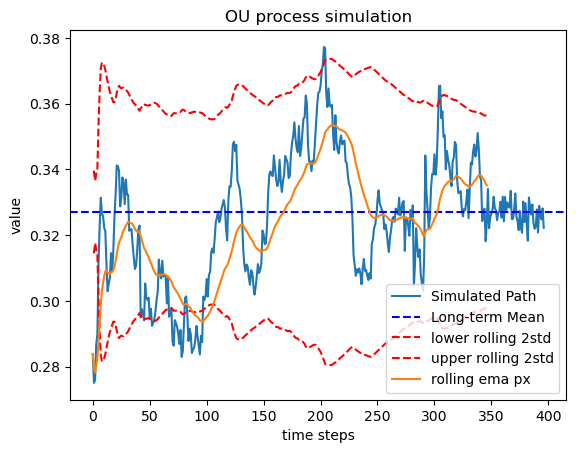

In [99]:
#plot
rolling_ewma_price =price_series['ratio'].ewm(com = 60).mean()
rolling_std =price_series['ratio'].ewm(com = 60).std()
plt.plot(price_series['ratio'].values, label = 'Simulated Path')
plt.plot(np.concatenate([price_series['ratio'].values, OU_simulation_df.mean().values]), label = 'Simulated Path')
plt.axhline(y=OU_params.gamma, color = 'b',linestyle = '--', label = 'Long-term Mean')
#plt.axhline(y=OU_params.gamma-OU_params.beta*3, color = 'r',linestyle = '--', label = 'upper 3sd')
#plt.axhline(y=OU_params.gamma+OU_params.beta*3, color = 'r',linestyle = '--', label = 'lower 3sd')
plt.plot(OU_params.gamma-2*rolling_std.bfill().values, color = 'r',linestyle = '--', label = 'lower rolling 2std')
plt.plot(OU_params.gamma+2*rolling_std.bfill().values,color = 'r',linestyle = '--', label = 'upper rolling 2std')
plt.plot(rolling_ewma_price.values, label = 'rolling ema px')


plt.title('OU process simulation')
plt.xlabel('time steps')
plt.ylabel('value')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

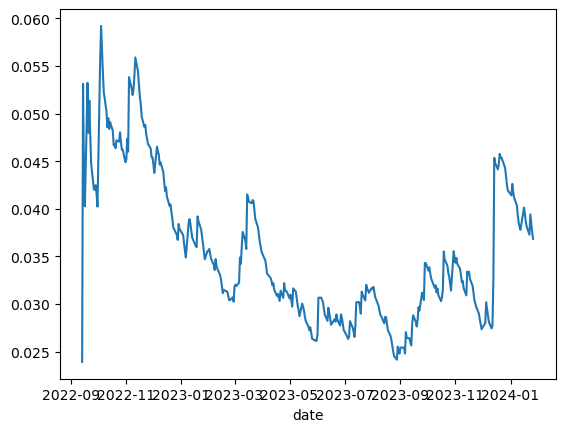

In [82]:
df['rolling_std'].plot()

<AxesSubplot:xlabel='date'>

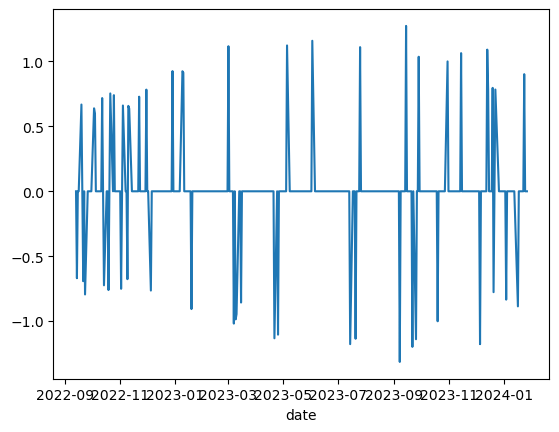

In [83]:
df['scaled_signal'].plot()

In [ ]:
ou_theta
ou_mu
ou_sigma
ou_half_life

In [112]:
#Create a simple backtest for each of the stationary pairs

for pair in adf_stationary_pvalues:
    print(pair)
    print('halflife_: '+str(ou_half_life[pair]))



#set a holding_period, then we shift signals over that horizon and add to get overall active positioning
holding_period = 5

df_pos = df[['scaled_signal']].copy()
for i in range(1, holding_period):
    df_pos['scaled_signal_'+str(i)] = df_pos['scaled_signal'].shift(i)
df_pos.fillna(0,inplace = True)
df_pos['pos'] = df_pos.sum(axis=1)
df= pd.merge(df,df_pos[['pos']], how = 'left', left_index = True, right_index = True)


df['strategy_returns']= df['daily_ret']*df['pos']
df['strategy_returns'].cumsum().plot()

MJUS Equity_IIPR Equity


KeyError: 'MJUS Equity_IIPR Equity'

In [113]:
ou_half_life

{}

<AxesSubplot:xlabel='date'>

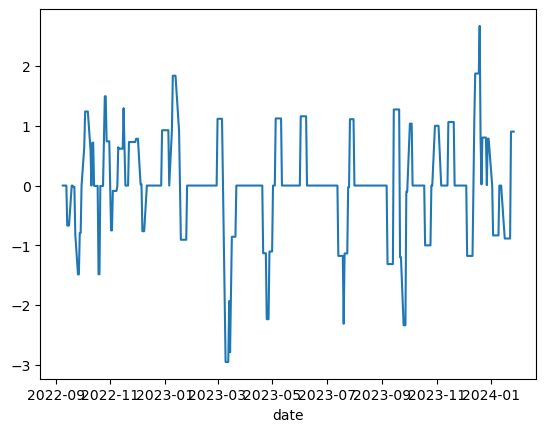

In [85]:
df_pos['pos'].plot()

<AxesSubplot:xlabel='date'>

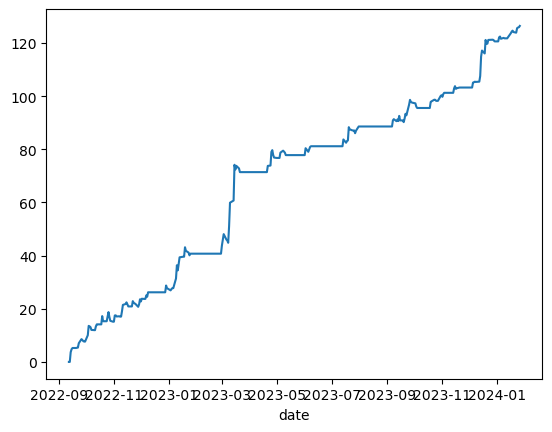

In [86]:
df['strategy_returns']= df['daily_ret']*df['pos']
df['strategy_returns'].cumsum().plot()

In [12]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
#import statsmodels.tsa.vector_ar.vecm as vm
from scipy.stats.stats import pearsonr
for lookback in [1, 5, 10, 25, 60]:
    for holddays in [1, 5, 10, 25, 60]:
        ret_lag=df.pct_change(periods=lookback)
        ret_fut=df.shift(-holddays).pct_change(periods=holddays)
        if (lookback >= holddays):
            indepSet=range(0, ret_lag.shape[0], holddays)
        else:
            indepSet=range(0, ret_lag.shape[0], lookback)
            
        ret_lag=ret_lag.iloc[indepSet]
        ret_fut=ret_fut.iloc[indepSet]
        goodDates=(ret_lag.notna() & ret_fut.notna()).values
        (cc, pval)=pearsonr(np.squeeze(np.asarray(ret_lag[goodDates])), np.squeeze(np.asarray(ret_fut[goodDates])))
        print('%4i %4i %7.4f %7.4f' % (lookback, holddays, cc, pval))


   1    1  0.0476  0.3773
   1    5 -0.0311  0.5664
   1   10 -0.0806  0.1396
   1   25 -0.0948  0.0894
   1   60 -0.0506  0.3930
   5    1 -0.0197  0.7167
   5    5 -0.1249  0.3066
   5   10 -0.2511  0.0388
   5   25 -0.1490  0.2361
   5   60 -0.1430  0.2843
  10    1 -0.0884  0.1052
  10    5 -0.2225  0.0682
  10   10 -0.4078  0.0167
  10   25 -0.2723  0.1316
  10   60 -0.2175  0.2570
  25    1 -0.0901  0.1066
  25    5 -0.1163  0.3563
  25   10 -0.1478  0.4194
  25   25 -0.3691  0.2146
  25   60 -0.1585  0.6416
  60    1 -0.0178  0.7636
  60    5 -0.0778  0.5614
  60   10 -0.0750  0.6989
  60   25  0.0963  0.7781
  60   60 -0.3942  0.5114


C:\Users\chengc3\AppData\Local\Temp\ipykernel_33292\750485217.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


,AA US Equity,daily_ret,pct_ret
date,,,
2022-09-09,52.620,NaN,NaN
2022-09-12,52.340,-0.280,-0.005321
2022-09-13,50.290,-2.050,-0.039167
2022-09-14,44.810,-5.480,-0.108968
2022-09-15,43.140,-1.670,-0.037268
...,...,...,...
2024-01-22,27.620,0.260,0.009503
2024-01-23,29.510,1.890,0.068429
2024-01-24,29.760,0.250,0.008472
